In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import random
import numpy as np

from amd.rocal.plugin.pytorch import ROCALClassificationIterator
import torch
torch.set_printoptions(threshold=10_000)
from amd.rocal.pipeline import Pipeline
import amd.rocal.fn as fn
import amd.rocal.types as types
# import rocal_pybind.tensor
import sys
import cv2
import os
import matplotlib.pyplot as plt




/opt/conda/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

data_path = "/media/audio_samples/MIVisionX-data/rocal_data/audio_samples/audio_wav_files/"
file_list = "/media/audio_samples/MIVisionX-data/rocal_data/audio_samples/audio_file_list.txt"
# data_path = "/media/audio_samples/MIVisionX-data/check/"
# file_list = "/media/audio_samples/MIVisionX-data/txt_file.txt"

_rali_cpu = True
batch_size = 1
num_threads = 1
device_id = 0
random_seed = random.SystemRandom().randint(0, 2**32 - 1)
print(random_seed)
crop=300

pipe = Pipeline(batch_size=batch_size, num_threads=num_threads,device_id=device_id, seed=random_seed, rocal_cpu=_rali_cpu)
local_rank = 0
world_size = 1

print("*********************************************************************")


    

3772406722
Pipeline has been created succesfully
*********************************************************************
OK: loaded 98 kernels from libvx_rpp.so
OK: loaded 2 kernels from libvx_amd_media.so


[INF]  {compute_optimum_internal_batch_size}  Can run 24 threads simultaneously on this machine
[INF]  {compute_optimum_internal_batch_size}  User batch size 1 Internal batch size set to 1


In [3]:
audio_pipeline = Pipeline(batch_size=batch_size, num_threads=num_threads, device_id=device_id, seed=3621326981, rocal_cpu=_rali_cpu)

Pipeline has been created succesfully
OK: loaded 98 kernels from libvx_rpp.so


[INF]  {compute_optimum_internal_batch_size}  Can run 24 threads simultaneously on this machine
[INF]  {compute_optimum_internal_batch_size}  User batch size 1 Internal batch size set to 1


OK: loaded 2 kernels from libvx_amd_media.so


In [4]:
with audio_pipeline:
    audio, label = fn.readers.file(
        # **files_arg,
        file_root=data_path,
        file_list=file_list,
        shard_id=0,
        num_shards=8,)
    sample_rate = 16000
    nfft=512
    window_size=0.02
    window_stride=0.01
    nfilter=80 #nfeatures
    resample = 1
    audio_decode = fn.decoders.audio(audio, file_root=data_path, downmix=True, sample_rate=sample_rate*resample, shard_id=0, num_shards=8)
    audio_pipeline.set_outputs(audio_decode)



OUT LIST LEN :  1


Inside the rocALAudioFileSourceSingleShard
 CASE FILE SYSFileSourceReader::initialize(ReaderConfig desc)
 _folder_path :: /media/audio_samples/MIVisionX-data/rocal_data/audio_samples/audio_wav_files/
 Comes here in find_max_dim
 Here in reset
  _reader->count_items()40
 Here in reset
 Input Path:: /media/audio_samples/MIVisionX-data/rocal_data/audio_samples/audio_wav_files/
 Completed the evaluation of audio data set max_frame:: 258160	 max_channels ::1[INF]  {rocalAudioFileSourceSingleShard}  Internal buffer size for audio frames = 258160

 CASE FILE SYSFileSourceReader::initialize(ReaderConfig desc)
 _folder_path :: /media/audio_samples/MIVisionX-data/rocal_data/audio_samples/audio_wav_files/
 Remaining audio count ::5

In [5]:
audio_pipeline.build()
audioIteratorPipeline = ROCALClassificationIterator(audio_pipeline)

HERE 1
HERE 2
HERE 3



 rocAL graph verified[INF]  {output_routine}  Output routine started with 5 to load


audio_data = audioIteratorPipeline
for i , it in enumerate(audioIteratorPipeline):
    a= it[0].numpy()
    print(type(a))
    print(a.shape)
    b=a[0]
    print(b.shape)
    b= b.flatten()
    print(b.shape)
    print(b)
    plt.plot(b)
    val =0.
    plt.plot(np.arange(-2,2,.5),b, 'x')
    

    
    




Comes to next
Number of dims 3
AUDIO DATA !!!!

 Batch Size 1

 Channels 258160

 Samples 1
<class 'torch.Tensor'>


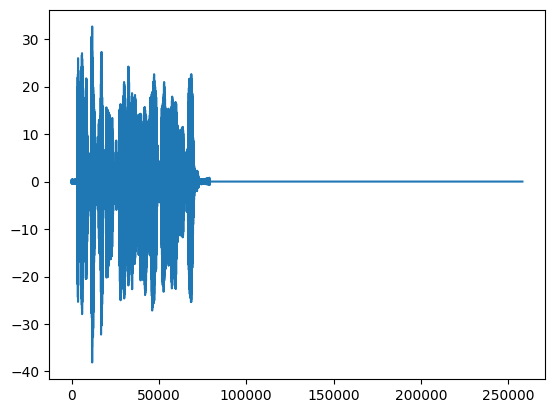

Comes to next
Number of dims 3
AUDIO DATA !!!!

 Batch Size 1

 Channels 258160

 Samples 1
<class 'torch.Tensor'>


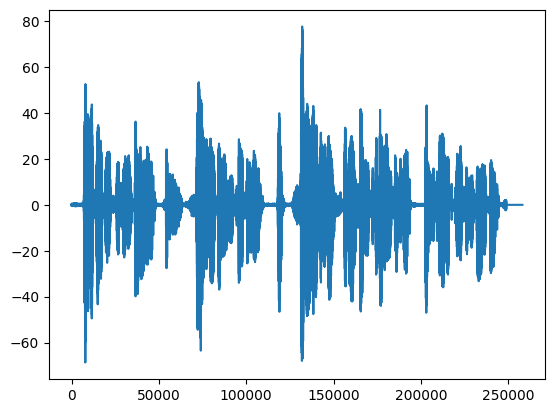

Comes to next
Number of dims 3
AUDIO DATA !!!!

 Batch Size 1

 Channels 258160

 Samples 1
<class 'torch.Tensor'>


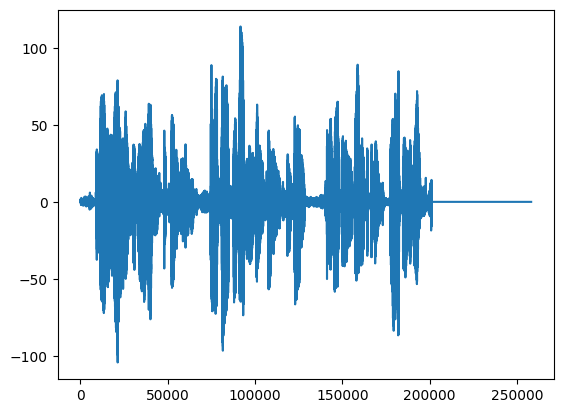

Comes to next
Number of dims 3
AUDIO DATA !!!!

 Batch Size 1

 Channels 258160

 Samples 1
<class 'torch.Tensor'>


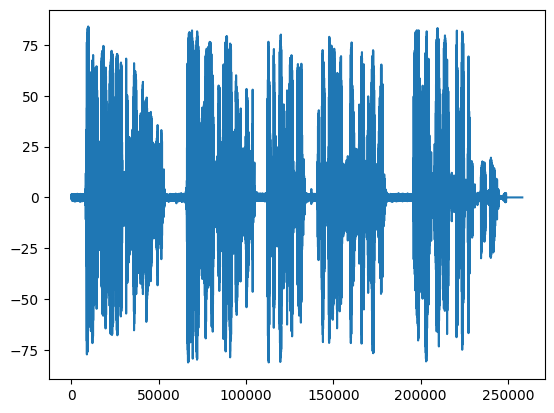

Comes to next
Number of dims 3
AUDIO DATA !!!!

 Batch Size 1

 Channels 258160

 Samples 1
<class 'torch.Tensor'>


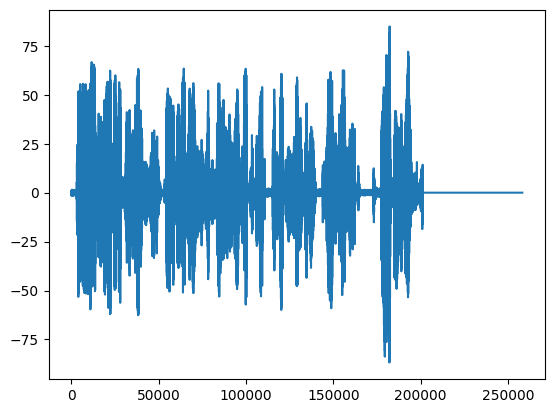

Comes to next


In [6]:
for i , it in enumerate(audioIteratorPipeline):
    b=it[0][0]
    print(type(b))
    b=b*225
    b=b.flatten()
    num_array=b.numpy()
    plt.plot(num_array)
    plt.show()



